# Projeto Bunitooooo de Redes Neurais BUNITAAAAASSSS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import plotly as plty
import sklearn as skl

import matplotlib.mlab as mlabQ
import seaborn as sns

from copy import copy as copy
from pprint import pprint

import sys
import os


def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [2]:
import tensorflow as tf
import keras

Using TensorFlow backend.


In [3]:
ds_path = os.path.abspath("./") + "/cifar-10-batches-py/"

batch_container = [ None for _ in range(5)]

for ii in os.listdir(ds_path):
    if "data" in ii:
        current_id = int(ii[-1]) - 1
        batch_container[current_id] = unpickle(ds_path + ii)
        
        dummy = batch_container[current_id]
        kkeys = list(dummy.keys())

        for kk in kkeys:
            dummy[repr(kk)[2:-1]] = dummy.pop(kk)      

In [4]:
keys_ids = ['batch_label', 'labels', 'data', 'filenames']

In [5]:
for ii in range(5):
    print(ii + 1)
    print(repr(batch_container[ii][keys_ids[0]])[2:-1])
    for keys_ in keys_ids[1:]:
        print(len(batch_container[ii][keys_]))

1
training batch 1 of 5
10000
10000
10000
2
training batch 2 of 5
10000
10000
10000
3
training batch 3 of 5
10000
10000
10000
4
training batch 4 of 5
10000
10000
10000
5
training batch 5 of 5
10000
10000
10000


In [6]:
x_data = [ batch_container[ii]["data"] for ii in range(5)]
y_data = [ batch_container[ii]["labels"] for ii in range(5)]

2

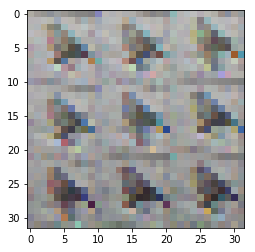

In [7]:
imgplot = plt.imshow(batch_container[0]["data"][120].reshape((32,32,3)),shape=(32,32,3))
batch_container[0]["labels"][120]

In [8]:
from keras.datasets import cifar10

### Paramethers

num_classes = 10
#epochs = 50
#data_augmentation = True
#num_predictions = 20

####

# The data, split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


(32, 32, 3) [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


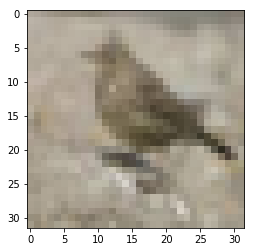

In [9]:
imgplot = plt.imshow(x_train[120],shape=(32,32,3))

print(
x_train[120].shape,
y_train[120],)

**Both image above are the same, but the first has being load from Disk and the other dowload directly from the Keras Repo. Dataset.**

> we are gonna work using the second loaded dataset

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten

#Architecture

def createModel(input_shape, nClasses):
    model = Sequential()
    
    model.add(Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(Conv2D(32, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))
 
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(nClasses, activation='softmax'))
     
    return model

In [11]:
epochs = 100
batch_size = 1000

model1 = createModel(x_train.shape[1:], num_classes)

model1.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])
 
history = model1.fit(x_train, y_train, batch_size=batch_size, epochs=epochs, verbose=1, 
                   validation_data=(x_test, y_test))
 
model1.evaluate(x_test, y_test)

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 16s 315us/step - loss: 2.7738 - acc: 0.1324 - val_loss: 2.2334 - val_acc: 0.1583
Epoch 2/50
50000/50000 [==============================] - 13s 254us/step - loss: 2.1424 - acc: 0.2198 - val_loss: 1.8683 - val_acc: 0.3314
Epoch 3/50
50000/50000 [==============================] - 13s 259us/step - loss: 2.0170 - acc: 0.2680 - val_loss: 1.8579 - val_acc: 0.3762
Epoch 4/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.8373 - acc: 0.3316 - val_loss: 1.6382 - val_acc: 0.4170
Epoch 5/50
50000/50000 [==============================] - 13s 257us/step - loss: 1.7778 - acc: 0.3619 - val_loss: 1.6363 - val_acc: 0.4411
Epoch 6/50
50000/50000 [==============================] - 13s 254us/step - loss: 1.6904 - acc: 0.3924 - val_loss: 1.6535 - val_acc: 0.4325
Epoch 7/50
50000/50000 [==============================] - 13s 255us/step - loss: 1.6378 - acc: 0.4182 - val_loss: 1.

[0.6591062291145324, 0.7764]

Text(0.5,1,'Accuracy Curves')

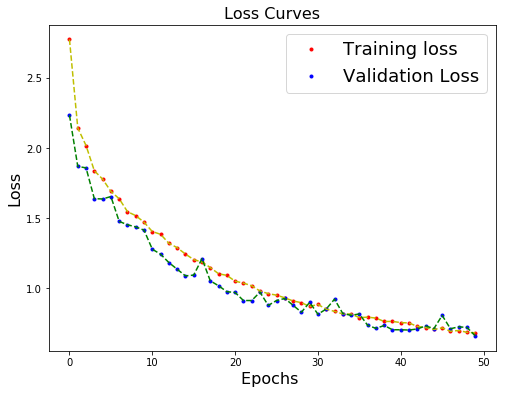

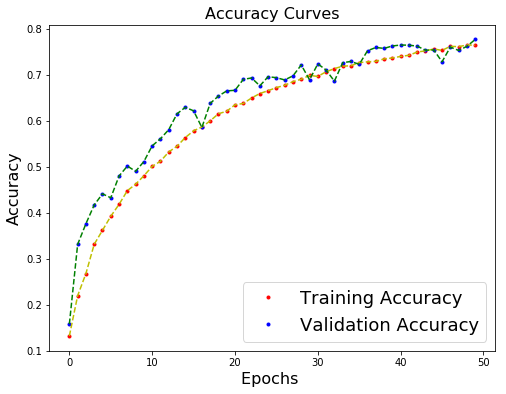

In [12]:
# Loss Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['loss'],'.r')
plt.plot(history.history['val_loss'],'.b')
plt.plot(history.history['loss'],'--y')
plt.plot(history.history['val_loss'],'--g')
plt.legend(['Training loss', 'Validation Loss'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Loss',fontsize=16)
plt.title('Loss Curves',fontsize=16)
 
# Accuracy Curves
plt.figure(figsize=[8,6])
plt.plot(history.history['acc'],'.r')
plt.plot(history.history['val_acc'],'.b')
plt.plot(history.history['acc'],'--y')
plt.plot(history.history['val_acc'],'--g')
plt.legend(['Training Accuracy', 'Validation Accuracy'],fontsize=18)
plt.xlabel('Epochs ',fontsize=16)
plt.ylabel('Accuracy',fontsize=16)
plt.title('Accuracy Curves',fontsize=16)

In [14]:
model1.save(filepath="./ann_model", include_optimizer=1)